In [1]:
import pandas as pd
import glosarios
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('comentarios_la_gaceta.csv', index_col = 0)

In [3]:
df.columns

Index(['es_respuesta', 'fecha', 'likes', 'nota_id', 'nota_url', 'respuestas',
       'texto', 'usuario', 'seccion', 'titulo', 'url'],
      dtype='object')

In [45]:
misoginos = [x.lower() for x in glosarios.misoginos]
ideologicos = [x.lower() for x in glosarios.ideologicos]
homofobicos = [x.lower() for x in glosarios.homofobicos]
racistas = [x.lower() for x in glosarios.racistas]
violentos = [x.lower() for x in glosarios.violentos]
xenofobos = [x.lower() for x in glosarios.xenofobos]

In [46]:
coments = 0
word_count = 0
comentarios_eliminados = 0
comentario_moderado = []
fill_coment = []
likes_count = 0
for c, i in zip(df.texto.values,df.index.values):
    coments+=1
    likes_count = (likes_count + (df.loc[i,'likes']))
    
    try:
        palabra = c.split()
        palabra = [x.lower() for x in palabra]
        if ('Ver normas de uso del servicio.') in c:
            comentarios_eliminados +=1
#             id_coment = i
            comentario_moderado.append(i)
        for p in palabra:
            if palabra in misoginos:
                fill_coment.append({i:'misoginos'})
            elif palabra in ideologicos:
                fill_coment.append({i:'ideologicos'})
            elif palabra in homofobicos:
                fill_coment.append({i:'homofobicos'})
            elif palabra in racistas:
                fill_coment.append({i:'racistas'})
            elif palabra in violentos:
                fill_coment.append({i:'violentos'})
            elif palabra in xenofobos:
                fill_coment.append({i:'xenofobos'})
            
    except:
        continue
    for p in palabra:
        word_count+=1
#         p = p.lower()

promedio = (word_count/coments)

print('Extension promedio en palabras por comentarios :' , promedio)
print('Cantidad de comentarios : ' , coments )
print ('Cantidad de comentarios eliminados :' , comentarios_eliminados)
print(('Cantidad de palabras').rstrip() , word_count)
print('Cantidad total de likes :' , likes_count)
print('Promedio de likes por comentarios :',(likes_count/coments))

Extension promedio en palabras por comentarios : 31.47506726457399
Cantidad de comentarios :  22300
Cantidad de comentarios eliminados : 50
Cantidad de palabras 701894
Cantidad total de likes : 301059
Promedio de likes por comentarios : 13.500403587443946


In [47]:
fill_coment

[]

In [6]:
data_moderada = []
for i in comentario_moderado:
    es_respuesta = df.loc[i,'es_respuesta']
    fecha = df.loc[i,'fecha']
    likes = df.loc[i,'likes']
    nota_id = df.loc[i,'nota_id']
    nota_url = df.loc[i,'nota_url']
    respuestas = df.loc[i,'respuestas']
    texto = df.loc[i,'texto']
    usuario = df.loc[i,'usuario']
    seccion = df.loc[i,'seccion']
    titulo = df.loc[i,'titulo']
    url = df.loc[i,'url']
    data_moderada.append({'fecha':fecha,'likes':likes,'nota_id':nota_id,'nota_url':nota_url,'respuestas':respuestas,'texto':texto,'usuario':usuario,'seccion':seccion,'titulo':titulo,'url':url})

In [7]:
df_mod = pd.DataFrame(data_moderada)

In [8]:
#Descripcion del data set de comentarios eliminados
df_mod.describe()

,likes,nota_id,respuestas
count,50.000000,50.000000,50.000000
mean,9.540000,578.780000,1.680000
std,10.834959,347.068792,1.300549
min,1.000000,27.000000,1.000000
25%,2.000000,351.750000,1.000000
50%,7.000000,491.000000,1.000000
75%,11.000000,933.000000,2.000000
max,65.000000,1088.000000,7.000000


seccion
economia     3
mundo        7
politica    29
sociedad    11
Name: titulo, dtype: int64


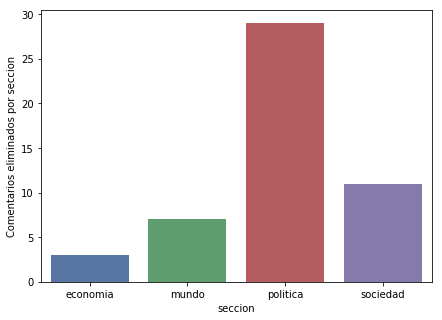

In [9]:
#Cantidad de comentarios eliminados por seccion
f, ax3 = plt.subplots(1, figsize=(7, 5), sharex=False)
sns.barplot(x=df_mod.groupby('seccion').count().index, y=df_mod.groupby('seccion').count().titulo, palette="deep", ax=ax3)
# ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Comentarios eliminados por seccion")

print(df_mod.groupby('seccion').titulo.count());

In [50]:
df_mod.groupby(['texto','seccion']).count()

fecha  likes  \
texto                                              seccion                  
Comentario con excesos eliminado por el moderad... economia      1      1   
                                                   politica      1      1   
Eliminado por apología al delito. Ver normas de... mundo         1      1   
                                                   politica      1      1   
Eliminado por contener contenido discriminatori... mundo         1      1   
                                                   politica      1      1   
                                                   sociedad      1      1   
Eliminado por contener insultos o agravios cont... sociedad      1      1   
Eliminado por contenido violento. Ver normas de... economia      2      2   
                                                   mundo         3      3   
                                                   politica     19     19   
                                                   sociedad      7      7   
Eliminado por contenido violento. Ver normas de... mundo         1      1   
Eliminado por incluir datos sensibles. Ver norm... politica      1      1   
Eliminado por lenguaje inapropiado. Ver normas ... mundo         1      1   
                                                   politica      6      6   
                                                   sociedad      2      2   

                                                             nota_id  \
texto                                              seccion             
Comentario con excesos eliminado por el moderad... economia        1   
                                                   politica        1   
Eliminado por apología al delito. Ver normas de... mundo           1   
                                                   politica        1   
Eliminado por contener contenido discriminatori... mundo           1   
                                                   politica        1   
                                                   sociedad        1   
Eliminado por contener insultos o agravios cont... sociedad        1   
Eliminado por contenido violento. Ver normas de... economia        2   
                                                   mundo           3   
                                                   politica       19   
                                                   sociedad        7   
Eliminado por contenido violento. Ver normas de... mundo           1   
Eliminado por incluir datos sensibles. Ver norm... politica        1   
Eliminado por lenguaje inapropiado. Ver normas ... mundo           1   
                                                   politica        6   
                                                   sociedad        2   

                                                             nota_url  \
texto                                              seccion              
Comentario con excesos eliminado por el moderad... economia         1   
                                                   politica         1   
Eliminado por apología al delito. Ver normas de... mundo            1   
                                                   politica         1   
Eliminado por contener contenido discriminatori... mundo            1   
                                                   politica         1   
                                                   sociedad         1   
Eliminado por contener insultos o agravios cont... sociedad         1   
Eliminado por contenido violento. Ver normas de... economia         2   
                                                   mundo            3   
                                                   politica        19   
                                                   sociedad         7   
Eliminado por contenido violento. Ver normas de... mundo            1   
Eliminado por incluir datos sensibles. Ver norm... politica         1   
Eliminado por lenguaje inapropiado. Ver normas ... mundo    

In [11]:
#Descripcion del data set de comentarios
df.describe()

,likes,nota_id,respuestas
count,22300.000000,22300.000000,22300.000000
mean,13.500404,584.764529,0.402466
std,12.833409,303.970971,0.925758
min,0.000000,2.000000,0.000000
25%,4.000000,327.000000,0.000000
50%,10.000000,605.000000,0.000000
75%,20.000000,834.000000,0.000000
max,105.000000,1100.000000,14.000000
